In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.special import loggamma
import project1



%load_ext autoreload
%autoreload 2

First, reading the graph:

In [2]:
G = project1.read_graph('example/example.gph')
data = project1.read_data('example/example.csv')

In [3]:
bayesian_score = project1.graph_bayesian_score(G, data)
bayesian_score

-132.02362143513778

## K2 algorithm

In [117]:
data = project1.read_data('data/medium.csv')
print(data.shape)
G = nx.DiGraph()
ordering = list(data.columns)
G.add_nodes_from(ordering)
print(G)

(4898, 12)
DiGraph with 12 nodes and 0 edges


In [118]:
initial_score = project1.graph_bayesian_score(G, data)
initial_score

-45367.62511363247

In [119]:
med_graph, med_score = project1.k2_algo(G, data, ordering, max_parents = len(ordering) // 4)

CHILD: volatileacidity
CHILD: citricacid
CHILD: residualsugar
CHILD: chlorides
CHILD: freesulfurdioxide
CHILD: totalsulfurdioxide
CHILD: density
CHILD: ph
CHILD: sulphates
CHILD: alcohol
CHILD: quality


In [137]:
out_df = pd.DataFrame(columns=['src', 'tgt'])
for src, tgt in med_graph.edges:
    out_df = out_df.append({'src': src, 'tgt':tgt}, ignore_index=True)
out_df.to_csv("graph/test.gph", header=False, index=False)

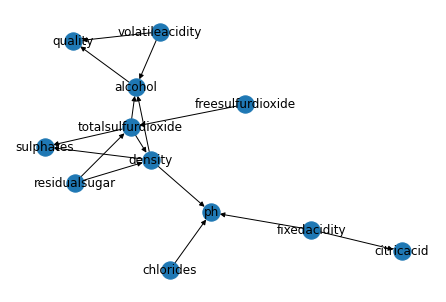

In [120]:
pos = nx.nx_agraph.graphviz_layout(med_graph)
nx.draw(med_graph, with_labels=True, pos=pos)